# figs_d25a.ipynb
Produce figures and analysis for manuscript.

Author: Benjamin S. Grandey.

In [1]:
import d25a
import datetime
import pandas as pd

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Print package versions
print(d25a.get_watermark())

Python implementation: CPython
Python version       : 3.10.16
IPython version      : 8.31.0

matplotlib: 3.10.0
numpy     : 2.2.2
pandas    : 2.2.3
seaborn   : 0.13.2
xarray    : 2025.1.1

conda environment: d25a-rsl-fusion

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



Called fig_fusion_time_series(gmsl, None, None)
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_low-end_d25a.nc
Written fig01.pdf (0.03 MB)
Written fig01.png (0.23 MB)


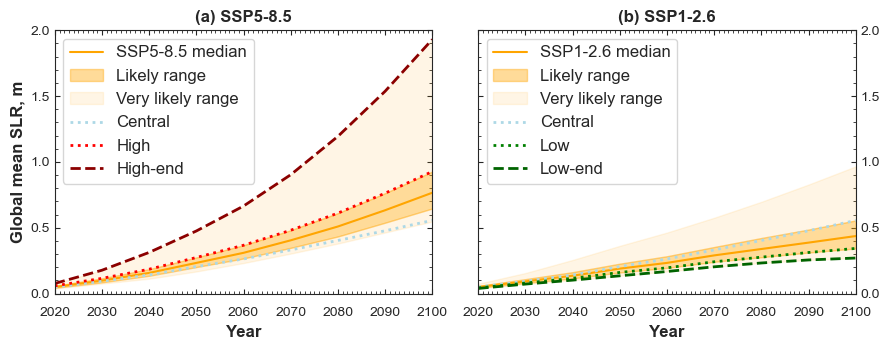

In [4]:
# Time series of GMSL
fig, axs = d25a.fig_fusion_time_series(slr_str='gmsl', gauges_str=None, loc_str=None)
_ = d25a.name_save_fig(fig, fso='f')

In [5]:
# Table of year-2100 global mean SLR projections and probability of exceedance
gmsl_df = d25a.get_gmsl_df().copy()
gmsl_df['gmsl_2100'] = gmsl_df['gmsl_2100'].round(2)  # round to nearest cm
# Print full results, before further rounding/formatting
print(gmsl_df)
# Round & format further for paper
for col in ['p_ssp126', 'p_ssp585']:  # show probabilities as both % and 1-in-N likelihood
    gmsl_df[col] = gmsl_df[col].apply(
        lambda x: (f'{x:.0f} %' if x > 1.0 else f'{x:.1f} %') + f' (1 in {int(round(100/x))})')
    gmsl_df[col] = gmsl_df[col].str.replace(r' (1 in 1)', '', regex=False)  # remove 1-in-1
gmsl_df.index = gmsl_df.index.str.capitalize()  # capitalize low -> Low etc
gmsl_df = gmsl_df.rename(columns={'definition': 'Definition',  # rename columns
                                  'gmsl_2100': 'Global mean SLR by 2100, m',
                                  'p_ssp126': 'Exceedance probability under SSP1-2.6',
                                  'p_ssp585': 'Exceedance probability under SSP5-8.5'})
print("Formatted for Word's 'Convert Text to Table':")
print(gmsl_df.to_csv(sep='\t'))  # suitable for Word's 'Convert Text to Table'
gmsl_df

Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_low-end_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
                        definition  gmsl_2100  p_ssp126  p_ssp585
high-end  95th %ile under SSP5-8.5       1.93     0.138     5.000
high      83rd %ile under SSP5-8.5       0.93     5.698    17.000
central   50th %ile under SSP2-4.5       0.56    16.976    94.508
low       17th %ile under SSP1-2.6       0.34    83.000    99.185
l

,Definition,"Global mean SLR by 2100, m",Exceedance probability under SSP1-2.6,Exceedance probability under SSP5-8.5
High-end,95th %ile under SSP5-8.5,1.93,0.1 % (1 in 725),5 % (1 in 20)
High,83rd %ile under SSP5-8.5,0.93,6 % (1 in 18),17 % (1 in 6)
Central,50th %ile under SSP2-4.5,0.56,17 % (1 in 6),95 %
Low,17th %ile under SSP1-2.6,0.34,83 %,99 %
Low-end,5th %ile under SSP1-2.6,0.27,95 %,100 %


In [6]:
# Table of summary statistics across cities for relative SLR in 2100 (mean, IQR, range, % above global mean)
summary_df = d25a.get_year_2100_summary_df(slr_str='rsl', gauges_str='grid', cities_str='cities').copy()
print(f'Count = {summary_df.loc["Count", "high-end"]}')
summary_df = summary_df.drop('Count')  # don't show Count column
summary_df.columns = summary_df.columns.str.capitalize()  # capitalize low -> Low etc
summary_df = summary_df.T.iloc[::-1]  # transpose rows and columns
print(summary_df.to_csv(sep='\t'))  # suitable for Word's 'Convert Text to Table'
summary_df

Reading year_2100/rsl_grid_cities_2100_d25a.csv
Reading time_series/gmsl_low-end_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Count = 875
	Median, m	IQR, m	Range, m	Proportion above global mean SLR, %	Correlation with high-end projection
High-end	2.1	1.9 to 2.2	1.3 to 2.7	74	1.0
High	1.0	1.0 to 1.1	0.5 to 1.7	91	0.91
Central	0.6	0.5 to 0.6	0.1 to 1.3	48	0.73
Low	0.2	0.1 to 0.3	-0.2 to 1.0	13	0.42
Low-end	0.1	-0.1 to 0.2	-0.4 to 0.9	10	0.26



,"Median, m","IQR, m","Range, m","Proportion above global mean SLR, %",Correlation with high-end projection
High-end,2.1,1.9 to 2.2,1.3 to 2.7,74,1.0
High,1.0,1.0 to 1.1,0.5 to 1.7,91,0.91
Central,0.6,0.5 to 0.6,0.1 to 1.3,48,0.73
Low,0.2,0.1 to 0.3,-0.2 to 1.0,13,0.42
Low-end,0.1,-0.1 to 0.2,-0.4 to 0.9,10,0.26


In [7]:
# For specific cities, what is the deviation from the global mean?
deviation_df = pd.DataFrame()
year_2100_df = d25a.read_year_2100_df(slr_str='rsl', gauges_str='grid', cities_str='megacities')
for city_short in ['Tokyo', 'New York', 'Jakarta', 'Singapore']:
    year_2100_ser = year_2100_df[year_2100_df['city_short'] == city_short].iloc[0]  # projections for city
    for proj_str in ['low-end', 'low', 'central', 'high', 'high-end']:
        gmsl = d25a.read_time_series_da(slr_str='gmsl', proj_str=proj_str).sel(years=2100).data
        deviation = year_2100_ser[proj_str] - gmsl
        deviation_perc = (deviation / gmsl) * 100
        deviation_str = f'{deviation:.2f} m ({deviation_perc:.0f} %)'
        deviation_df.loc[city_short, proj_str] = deviation_str
print('Deviation from global mean SLR in 2100:')
deviation_df

Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading time_series/gmsl_low-end_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_low-end_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_low-end_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_low-end_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Deviation from global mean SLR in 2100:


,low-end,low,central,high,high-end
Tokyo,-0.38 m (-141 %),-0.20 m (-59 %),0.02 m (4 %),0.28 m (31 %),0.38 m (20 %)
New York,0.10 m (37 %),0.15 m (43 %),0.23 m (42 %),0.29 m (32 %),0.25 m (13 %)
Jakarta,-0.33 m (-122 %),-0.17 m (-50 %),0.01 m (3 %),0.18 m (20 %),0.27 m (14 %)
Singapore,-0.33 m (-122 %),-0.18 m (-53 %),0.01 m (3 %),0.18 m (20 %),0.26 m (13 %)


Reading year_2100/rsl_grid_2100_d25a.csv
Plotting projection for 615 locations.
Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Written fig02.pdf (0.09 MB)
Written fig02.png (0.55 MB)


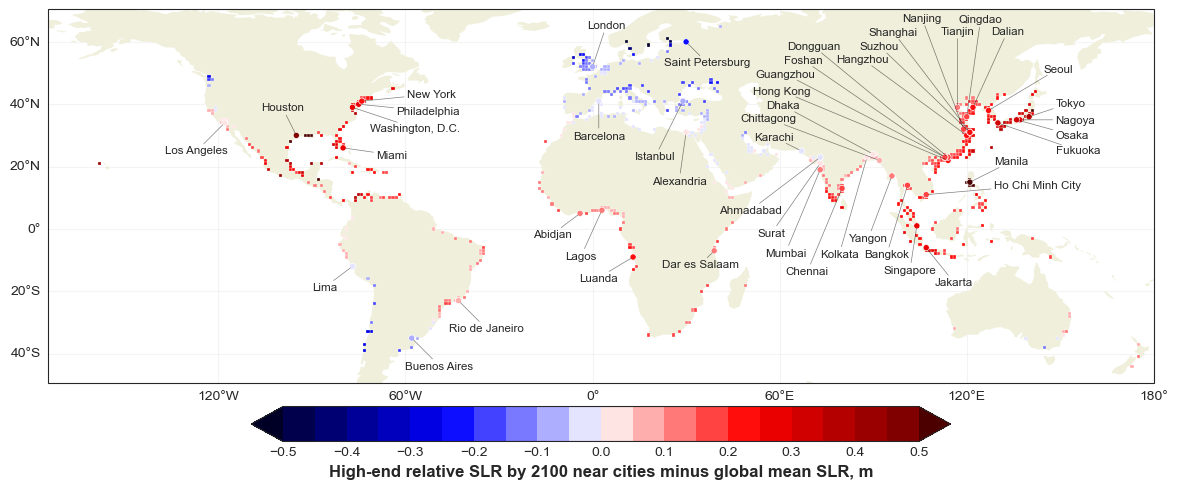

In [8]:
# Map showing high-end relative SLR projection
fig, ax = d25a.fig_year_2100_map(slr_str='rsl', gauges_str='grid', proj_str='high-end')
_ = d25a.name_save_fig(fig, fso='f')

Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading time_series/gmsl_high-end_d25a.nc
Written fig03.pdf (0.03 MB)
Written fig03.png (0.50 MB)


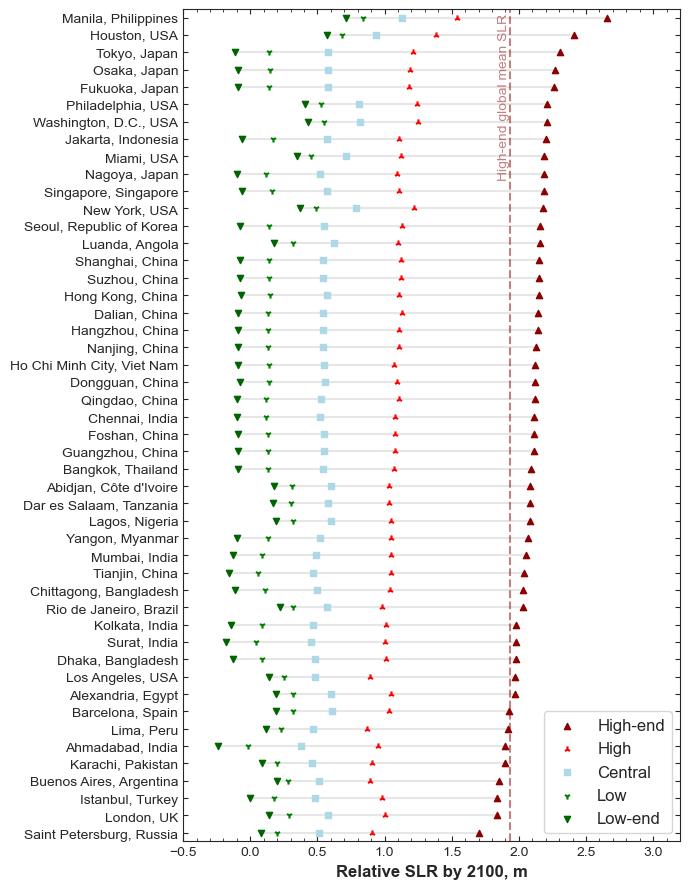

In [9]:
# Relative SLR projections for megacities
fig, ax = d25a.fig_year_2100_megacities(slr_str='rsl')
_ = d25a.name_save_fig(fig, fso='f')

Reading year_2100/novlm_grid_megacities_2100_d25a.csv
Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Written fig04.pdf (0.04 MB)
Written fig04.png (0.16 MB)


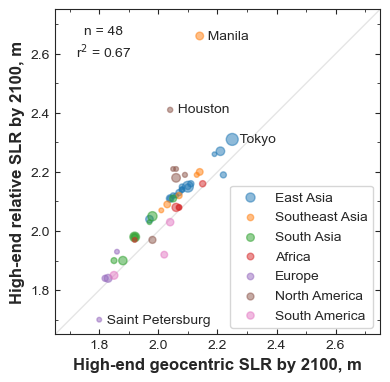

In [10]:
# Relative SLR vs geocentric SLR across megacities
fig, ax = d25a.fig_y_vs_x(x_proj_str='high-end', x_gauges_str='grid', x_slr_str='novlm',
                          y_proj_str='high-end', y_gauges_str='grid', y_slr_str='rsl',
                          cities_str='megacities', lims=(1.65, 2.75),
                          cities_to_label=('Tokyo', 'Manila', 'Houston', 'Saint Petersburg'))
_ = d25a.name_save_fig(fig, fso='f')

Reading year_2100/novlm_grid_2100_d25a.csv
Plotting projection for 615 locations.
Reading year_2100/novlm_grid_megacities_2100_d25a.csv
Written s01.pdf (0.09 MB)
Written s01.png (0.55 MB)


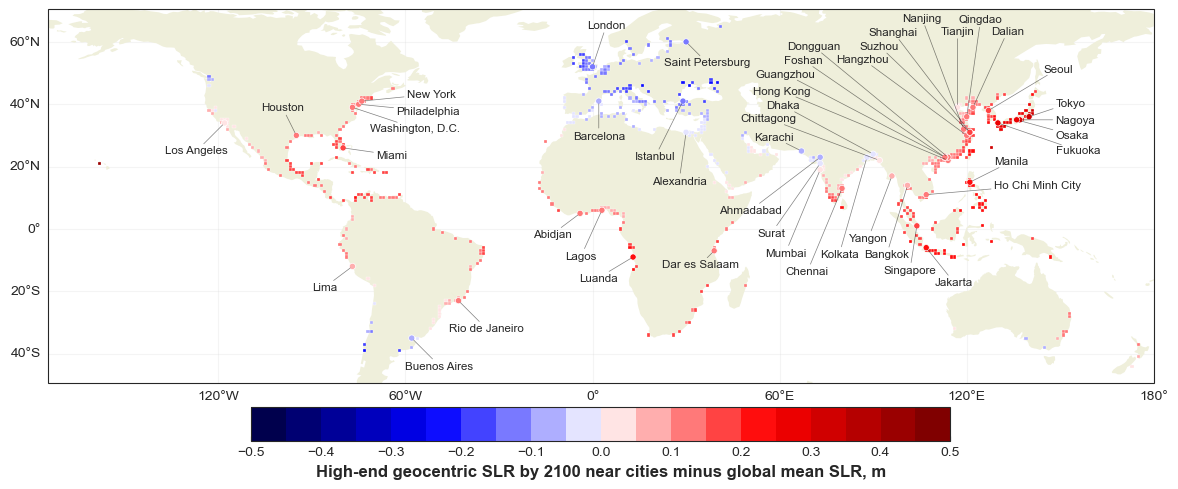

In [11]:
# Map showing high-end geocentric SLR projection
fig, ax = d25a.fig_year_2100_map(slr_str='novlm', gauges_str='grid', proj_str='high-end')
_ = d25a.name_save_fig(fig, fso='s')

Reading year_2100/novlm_grid_megacities_2100_d25a.csv
Reading time_series/gmsl_high-end_d25a.nc
Written s02.pdf (0.03 MB)
Written s02.png (0.50 MB)


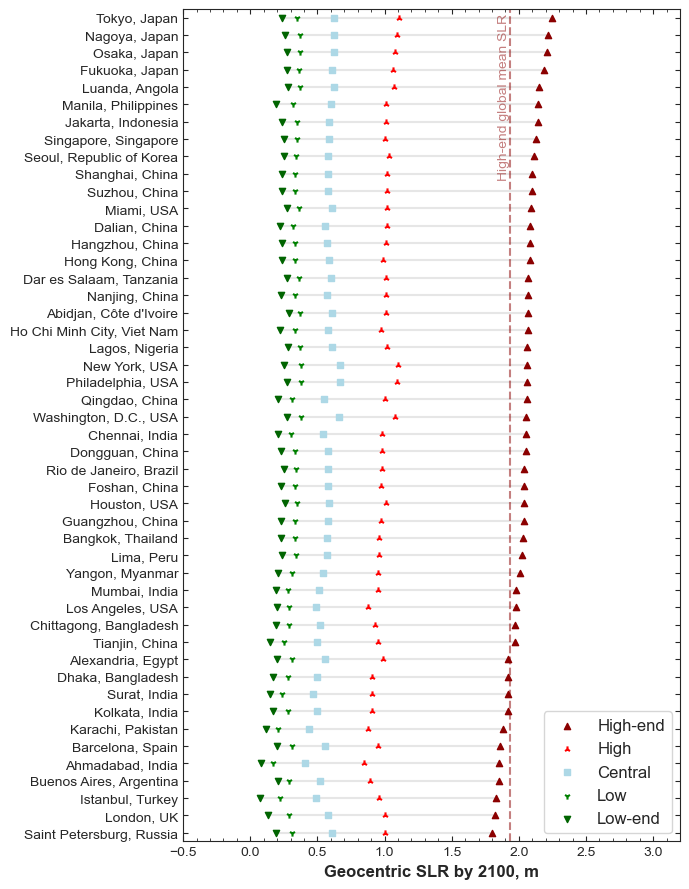

In [12]:
# Geocentric SLR projections for megacities
fig, ax = d25a.fig_year_2100_megacities(slr_str='novlm')
_ = d25a.name_save_fig(fig, fso='s')

Reading year_2100/rsl_gauges_2100_d25a.csv
Plotting projection for 1016 locations.
Written s03.pdf (0.09 MB)
Written s03.png (0.36 MB)


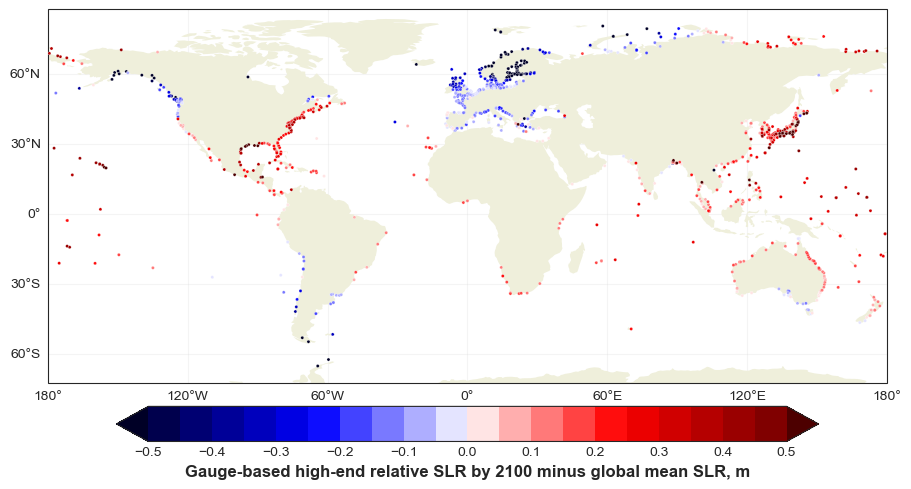

In [13]:
# Map showing high-end relative SLR projection at gauges
fig, ax = d25a.fig_year_2100_map(slr_str='rsl', gauges_str='gauges', proj_str='high-end')
_ = d25a.name_save_fig(fig, fso='s')

Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading year_2100/rsl_gauges_megacities_2100_d25a.csv
Written s04.pdf (0.03 MB)
Written s04.png (0.16 MB)


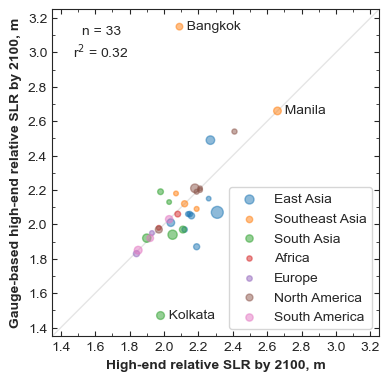

In [14]:
# Gauge-based vs grid-based relative SLR across megacities
fig, ax = d25a.fig_y_vs_x(x_proj_str='high-end', x_gauges_str='grid', x_slr_str='rsl',
                          y_proj_str='high-end', y_gauges_str='gauges', y_slr_str='rsl',
                          cities_str='megacities', lims=(1.35, 3.25),
                          cities_to_label=('Manila', 'Bangkok', 'Kolkata'))
_ = d25a.name_save_fig(fig, fso='s')

In [15]:
# # Country-level statistics of relative SLR in 2100
# fig, axs = d25a.fig_country_stats(slr_str='rsl', min_count=4, high_end_only=False)
# _ = d25a.name_save_fig(fig, fso='s')

In [16]:
# # High-end relative SLR vs VLM component for countries with the largest ranges.
# fig, axs = d25a.fig_rsl_vs_vlm()
# _ = d25a.name_save_fig(fig, fso='s')

In [17]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2025-07-22 18:10:49
End:       2025-07-22 18:10:59
Wall time: 10 s
